In [1]:
'''Imports'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline



In [2]:
'''load datasets'''

train_df = pd.read_csv('Datasets/SE_rents2018_train.csv')
test_df = pd.read_csv('Datasets/SE_rents2018_test1.csv')


In [3]:
train_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,...,0,0,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN
1,7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,...,0,0,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06
2,7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,...,1,0,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A
3,7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,...,0,0,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E
4,7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,...,0,0,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B


In [4]:
test_df.head()

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
0,7499437,#1B,18724,1,1.0,550.0,2018-08-22 10:00:37,167 MOTT STREET,New York,10013,...,0,0,2700,1,"By Owner, No Fees!\n\nNewly renovated building...",Little Italy,Manhattan,1B,1.0,B
1,7477903,#C4,403900,1,1.0,750.0,2018-08-15 11:41:23,107 LINDEN STREET,Brooklyn,11221,...,0,0,1650,1,this is a beautiful spacious renovated full s...,Bushwick,Brooklyn,C4,4.0,C
2,7481023,#GARDEN,18175264,2,1.0,800.0,2018-08-15 22:20:14,47 CARROLL STREET,Brooklyn,11231,...,1,0,2900,0,"Garden level, pet-friendly, 2 bedroom, 1 bath ...",Columbia St Waterfront District,Brooklyn,GARDEN,NaN,NaN
3,7479547,#2C,104863,2,2.0,1300.0,2018-08-15 16:05:22,952 COLUMBUS AVENUE,New York,10025,...,0,0,4750,1,Ivy Park is a boutique condominium with a uniq...,Upper West Side,Manhattan,2C,2.0,C
4,7518814,#9,95125,2,1.0,750.0,2018-08-29 12:00:12,424 EAST 116 STREET,New York,10029,...,0,0,1800,0,Located across from the New East River Plaza w...,East Harlem,Manhattan,9,NaN,NaN


In [5]:
print(f"Train Data Columns:{list(train_df)}\n")
print(f"Test Data Columns:{list(test_df)}\n")

Train Data Columns:['rental_id', 'addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']

Test Data Columns:['rental_id', 'addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_ch

In [6]:
print(f"Train Data Shape Before Drop:{train_df.shape}")
print(f"Test Data Shape Before Drop:{test_df.shape}\n")

# save id columns
train_id = train_df['rental_id']
test_id = test_df['rental_id']

#drop unnecessary columns

train_df.drop(["rental_id","created_at"],axis=1,inplace=True)
test_df.drop(["rental_id","created_at"],axis=1,inplace=True)

print(f"Train Data Shape After Drop: {train_df.shape}")
print(f"Test Data Shape After Drop: {test_df.shape}")

Train Data Shape Before Drop:(12000, 39)
Test Data Shape Before Drop:(2000, 39)

Train Data Shape After Drop: (12000, 37)
Test Data Shape After Drop: (2000, 37)


In [7]:
# Target Variable Description: 'rent'

train_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

mu: 3605.76
sigma:2.9e+03


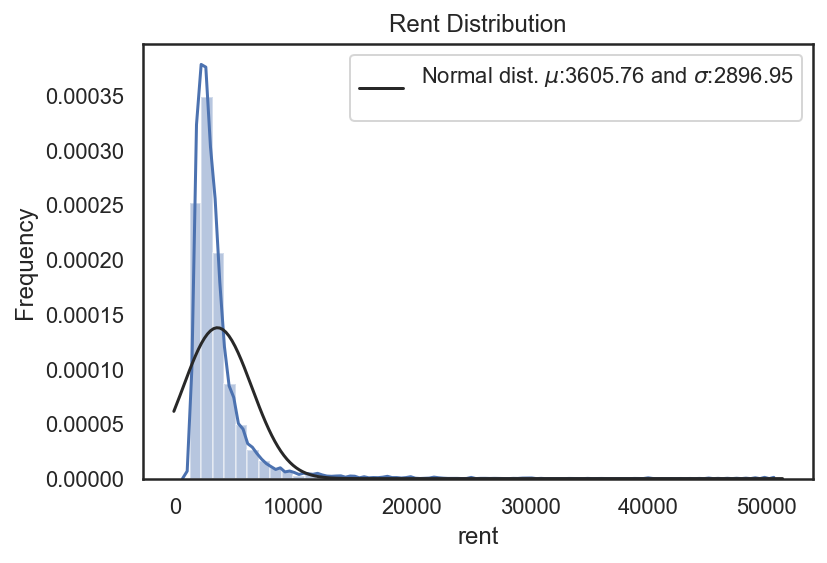

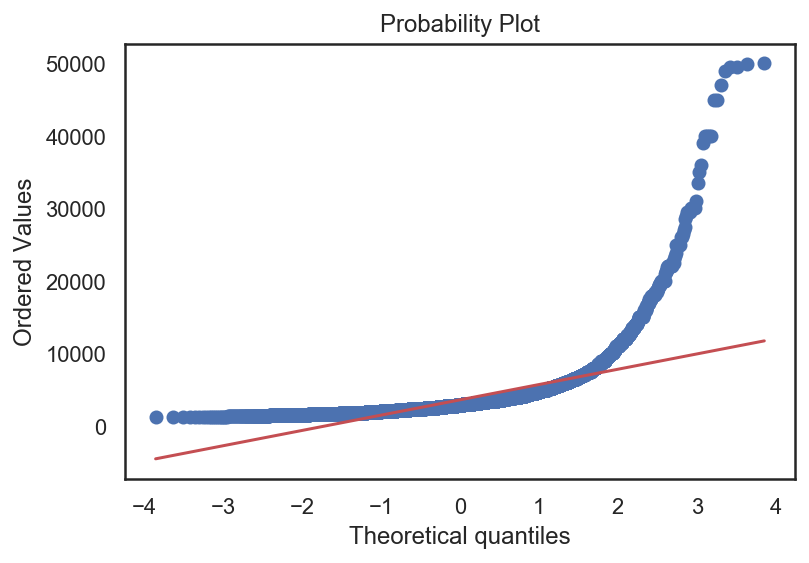

Skewness:6.282718976779915
Kurtosis:64.84190569996547


In [8]:
# Visualize Target Variable

sns.distplot(train_df['rent'], fit=norm)

(mu,sigma)= norm.fit(train_df['rent'])

print(f"mu: {mu:.2f}\nsigma:{sigma:.2}")

plt.legend([f'Normal dist. $\mu$:{mu:.2f} and $\sigma$:{sigma:.2f}\n'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent Distribution')

fig = plt.figure()
res = stats.probplot(train_df['rent'], plot=plt)
plt.show()

print(f"Skewness:{train_df['rent'].skew()}")
print(f"Kurtosis:{train_df['rent'].kurt()}")

Skewness suggest:
-Lack of symmetry in rent distribution
-Mean and median are greater than the mode

Kurtosis suggest:
-Heavy tails in distribution
-Lots of outliers in data

In [9]:
# Categorical Data
train_df.select_dtypes(include=['object']).columns

Index(['addr_unit', 'addr_street', 'addr_city', 'description', 'neighborhood',
       'borough', 'unit', 'line'],
      dtype='object')

In [10]:
# Numiercal Data 
train_df.select_dtypes(include=['int64','float64']).columns

Index(['building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'addr_zip',
       'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built',
       'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace',
       'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets',
       'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge',
       'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee',
       'floornumber'],
      dtype='object')

In [11]:
num_categorical = len(train_df.select_dtypes(include=['object']).columns)
num_numerical = len(train_df.select_dtypes(include=['int64','float64']).columns)
print(f"Categorical Features:{num_categorical}\nNumerical Features:{num_numerical}")
print(f"Total Features = {num_categorical+num_numerical}")


Categorical Features:8
Numerical Features:29
Total Features = 37


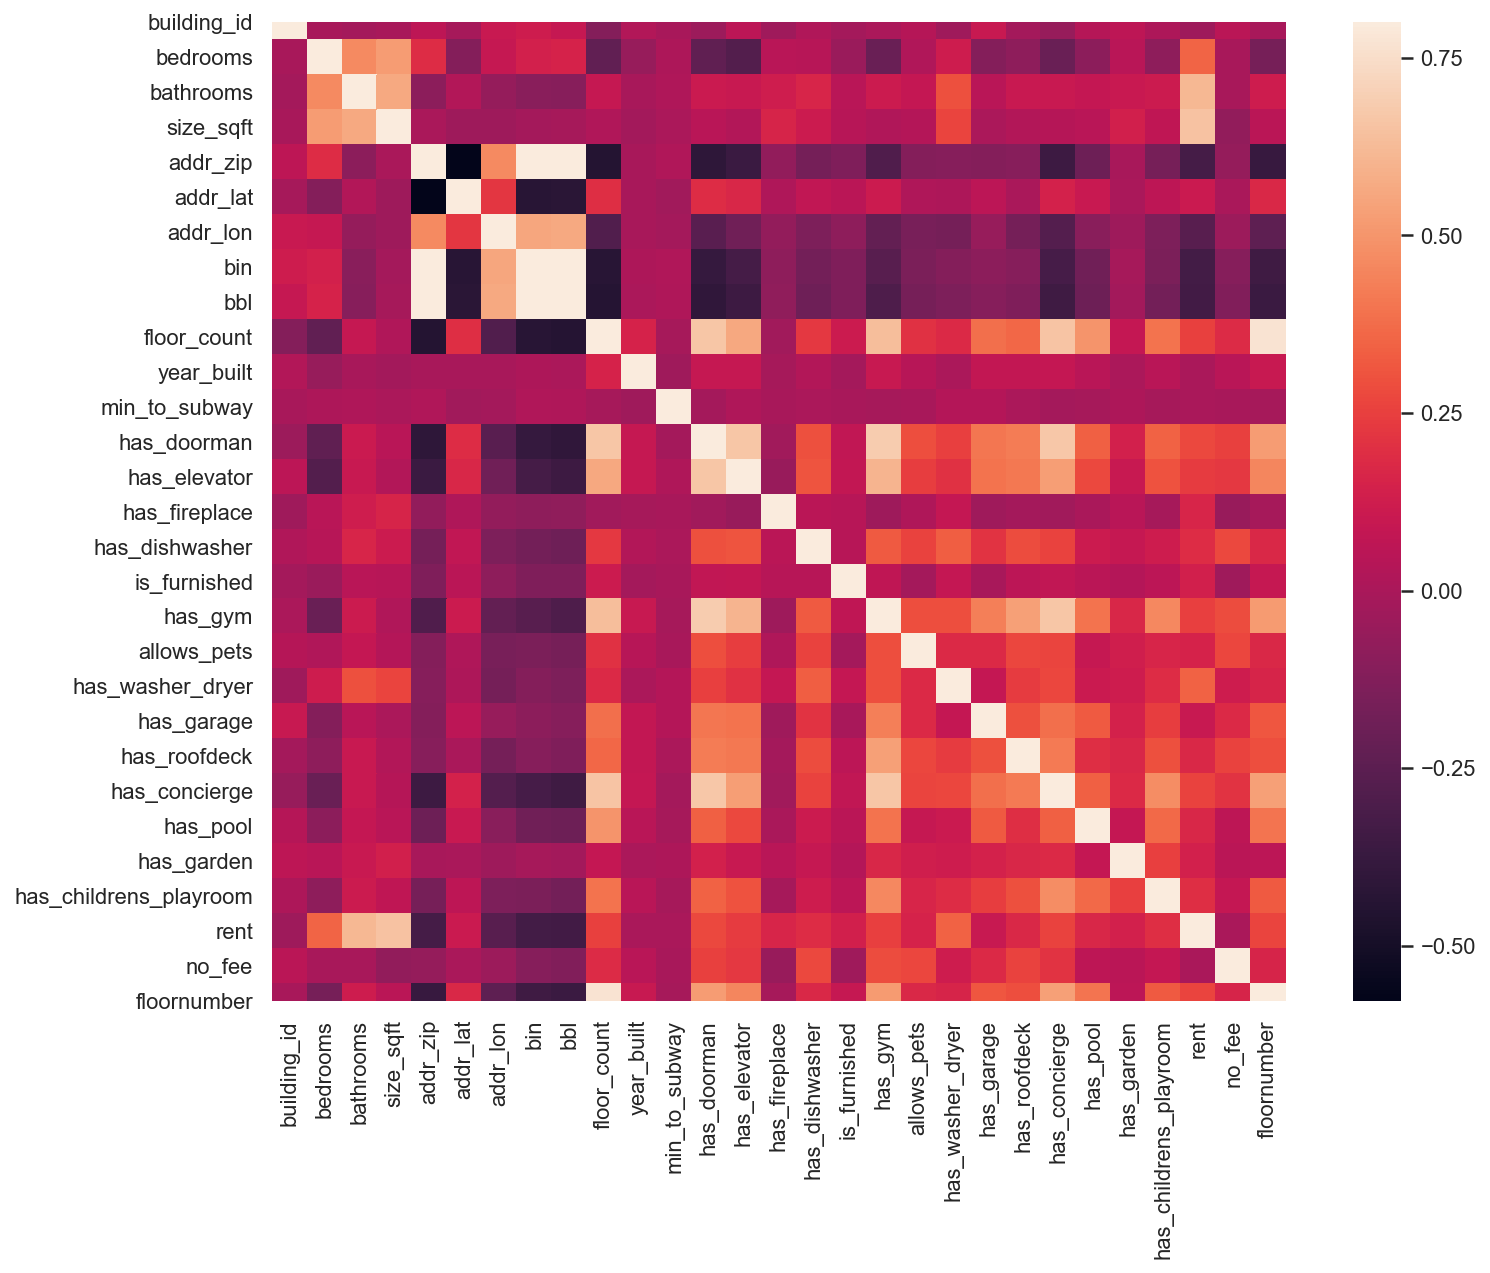

In [12]:
# Correlation Matrix Heatmap

corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

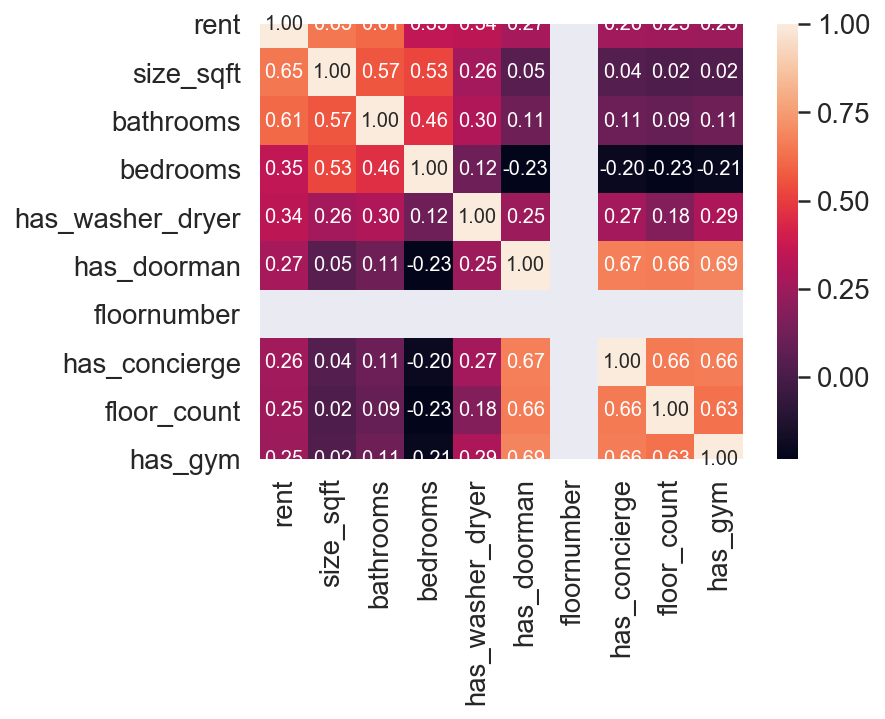

In [13]:
# Top k Heatmap

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'rent')['rent'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,rent
1,size_sqft
2,bathrooms
3,bedrooms
4,has_washer_dryer
5,has_doorman
6,floornumber
7,has_concierge
8,floor_count
9,has_gym


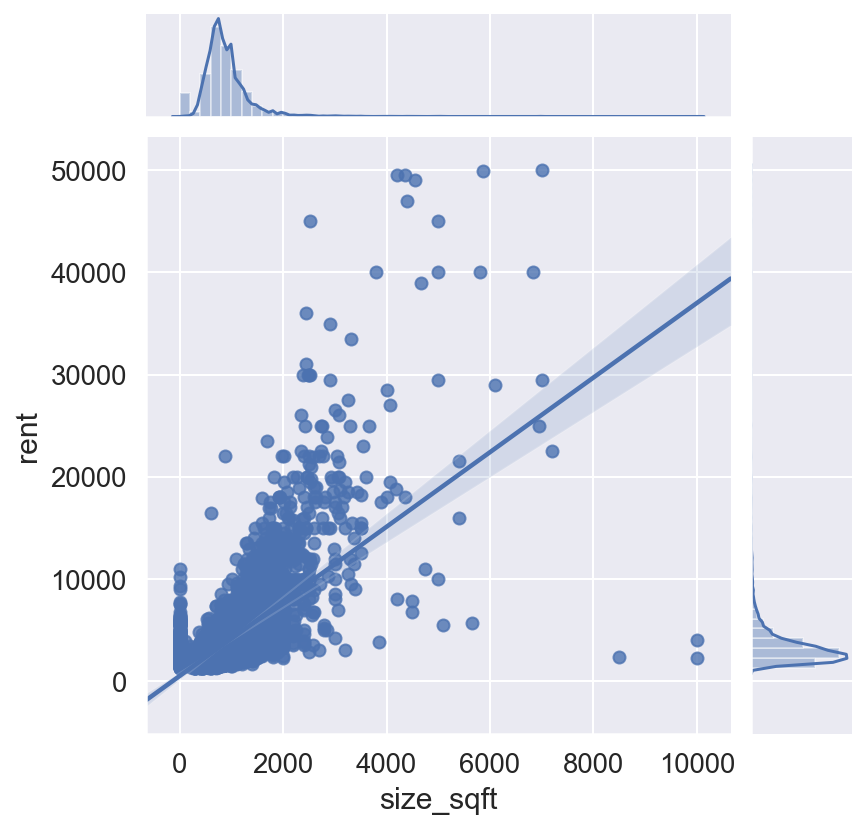

In [15]:
# size_sqft vs rent

sns.jointplot(x=train_df['size_sqft'], y=train_df['rent'], kind='reg')


In [16]:
# Remove outliers

train_df = train_df.drop(train_df[(train_df['size_sqft']>8000) 
                         & (train_df['rent']<10000)].index).reset_index(drop=True)

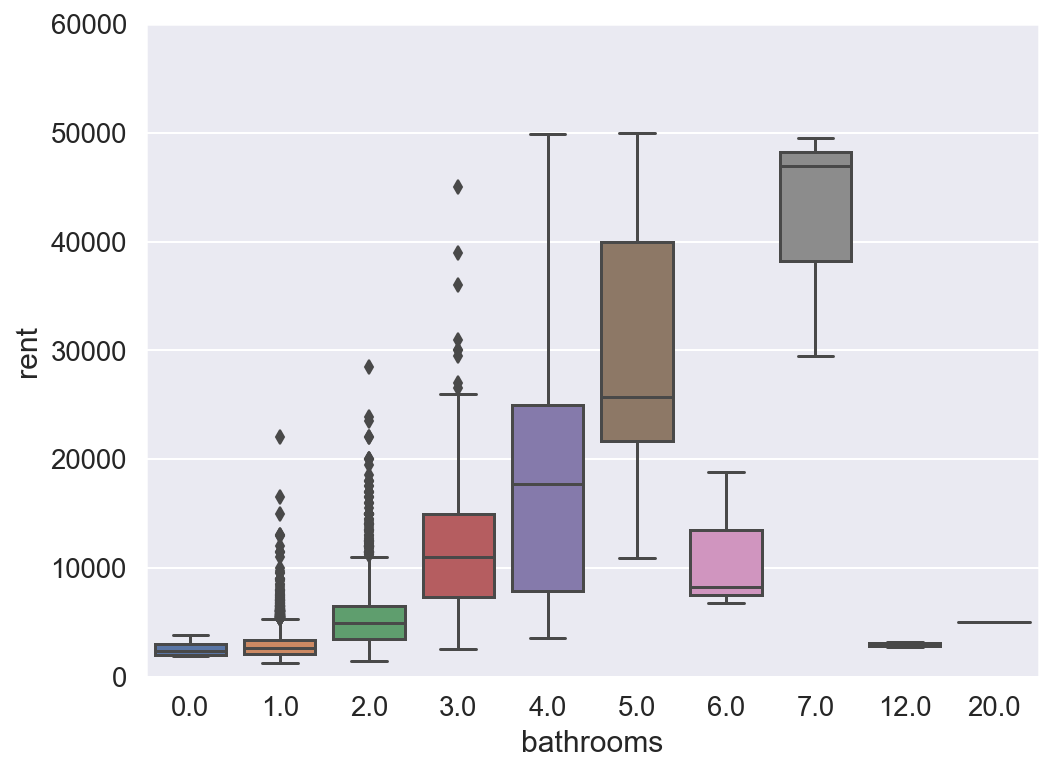

In [17]:
# bathrooms vs rent
var = 'bathrooms'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

In [18]:
# remove bathroom outliers

train_df = train_df.drop(train_df[(train_df['bathrooms']>=12) 
                         & (train_df['rent']<10000)].index).reset_index(drop=True)

train_df = train_df.drop(train_df[(train_df['bathrooms']==6) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)


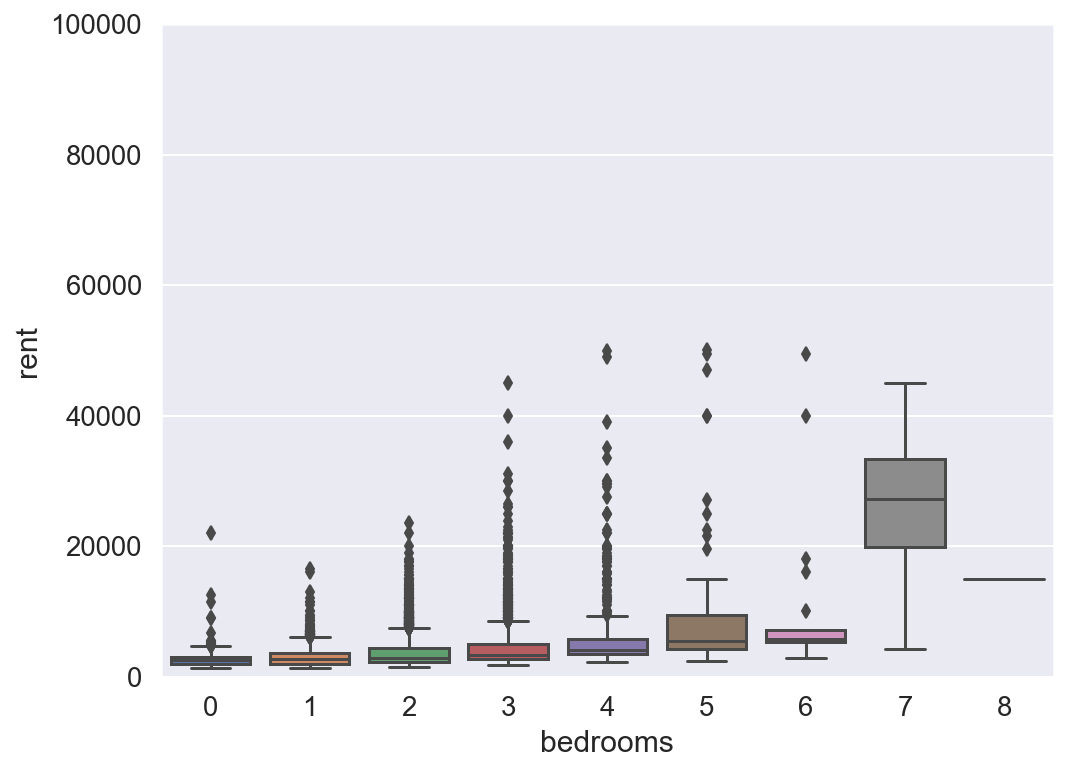

In [19]:
# bedrooms vs rent
var = 'bedrooms'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

In [20]:
# remove bedroom outliers
train_df = train_df.drop(train_df[(train_df['bedrooms']>=8) 
                         & (train_df['rent']<20000)].index).reset_index(drop=True)

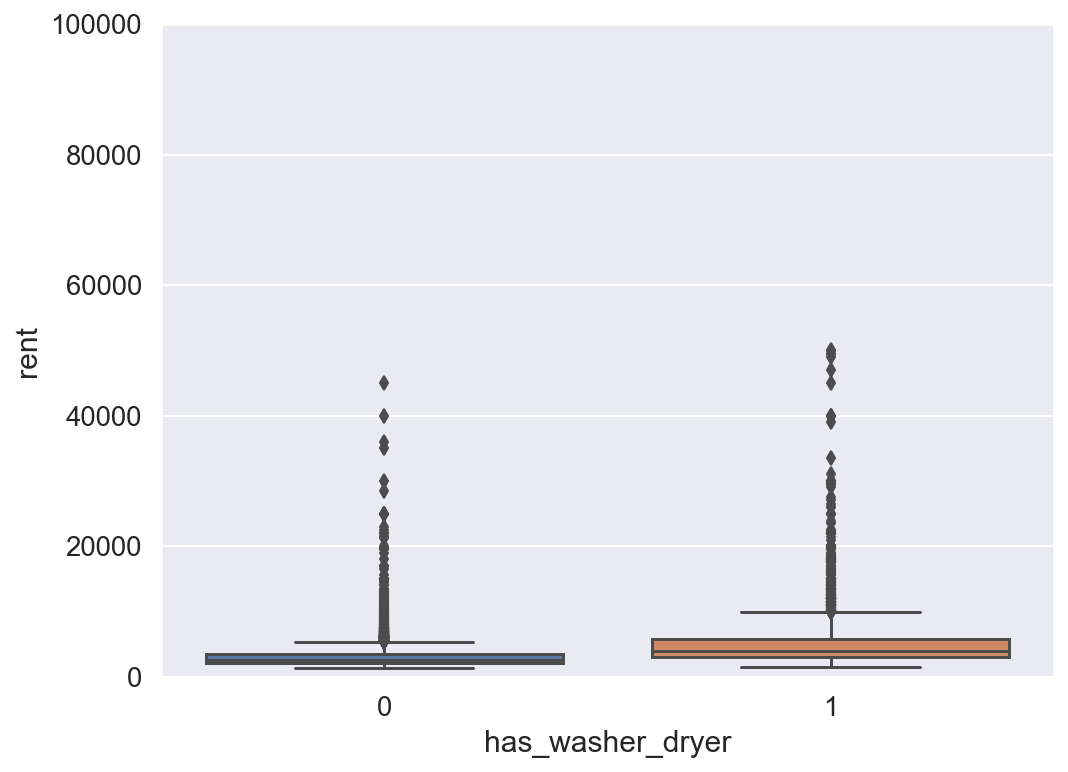

In [21]:
# has_washer_dryer vs rent
var = 'has_washer_dryer'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

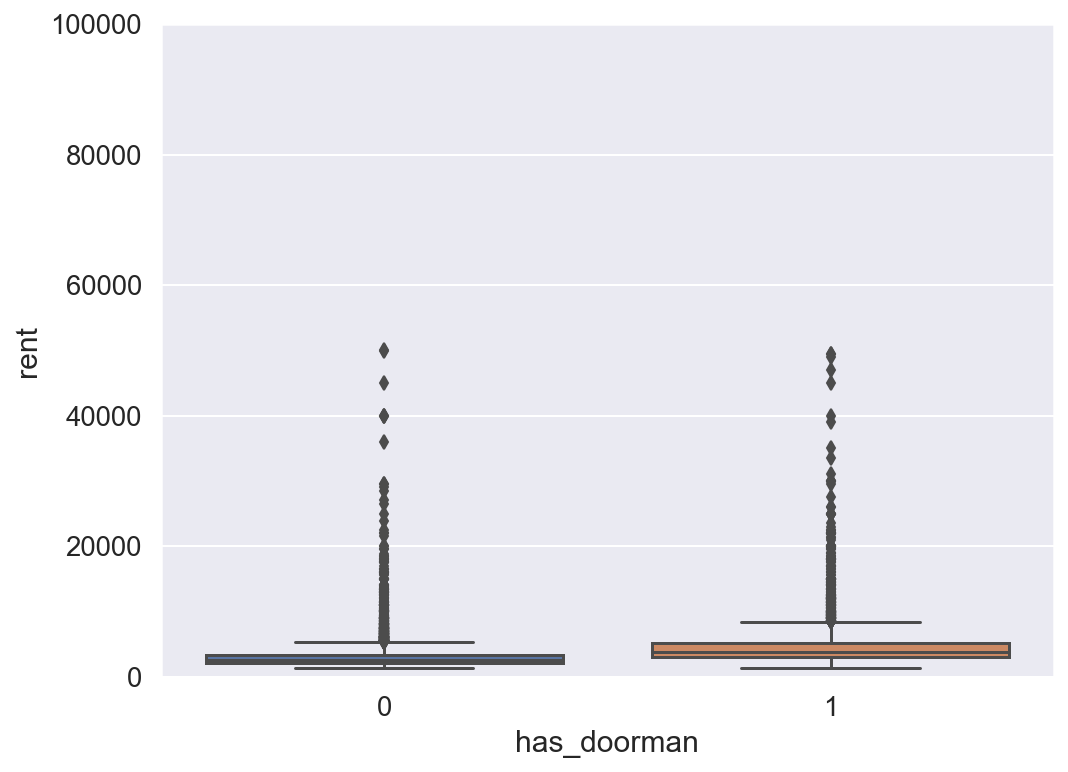

In [22]:
# has_doorman vs rent

var = 'has_doorman'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=100000);

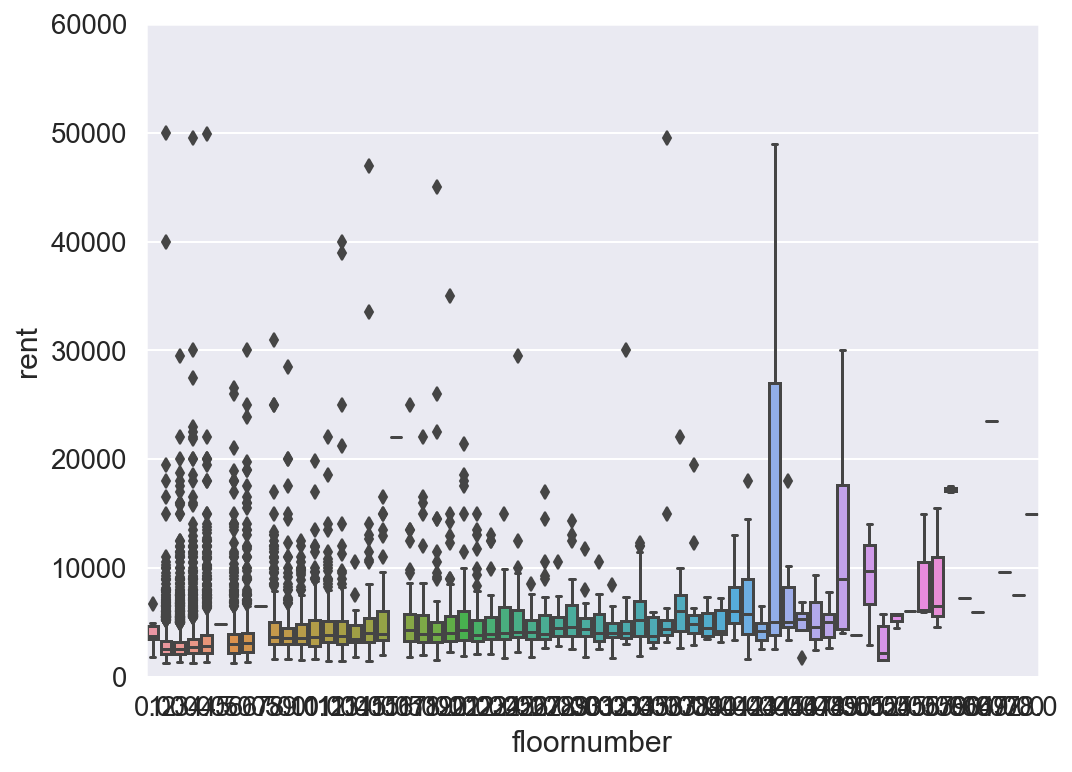

In [23]:
# floornumber vs rent

var = 'floornumber'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

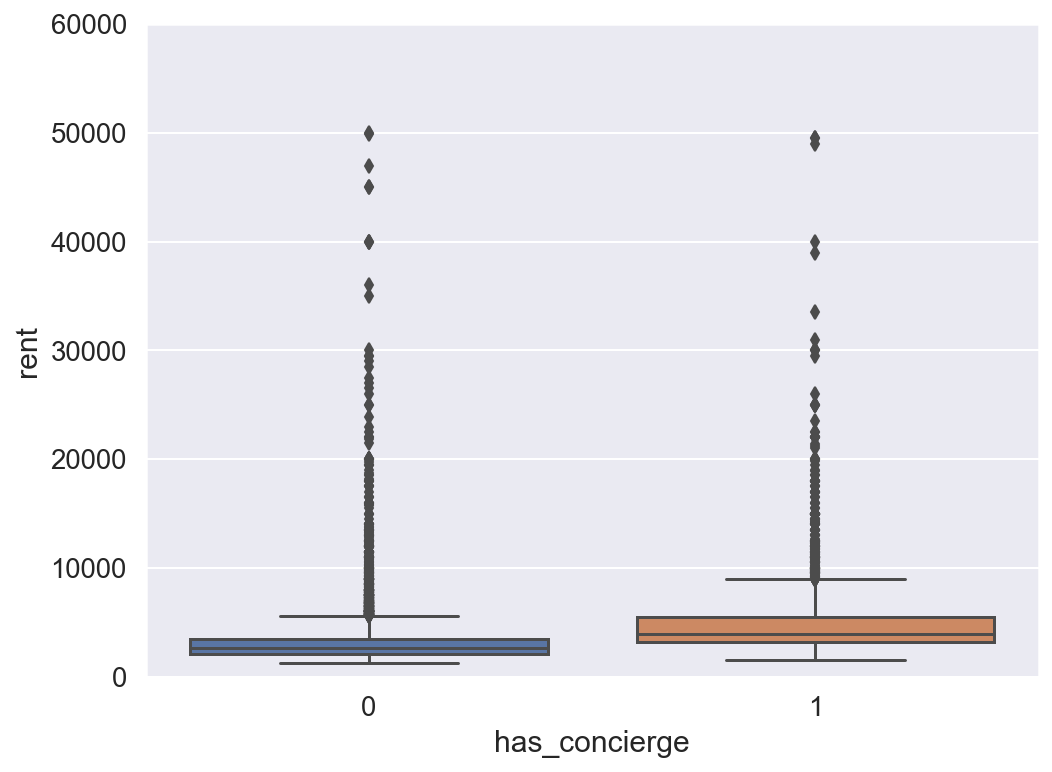

In [24]:
# has_concierge vs rent

var = 'has_concierge'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);


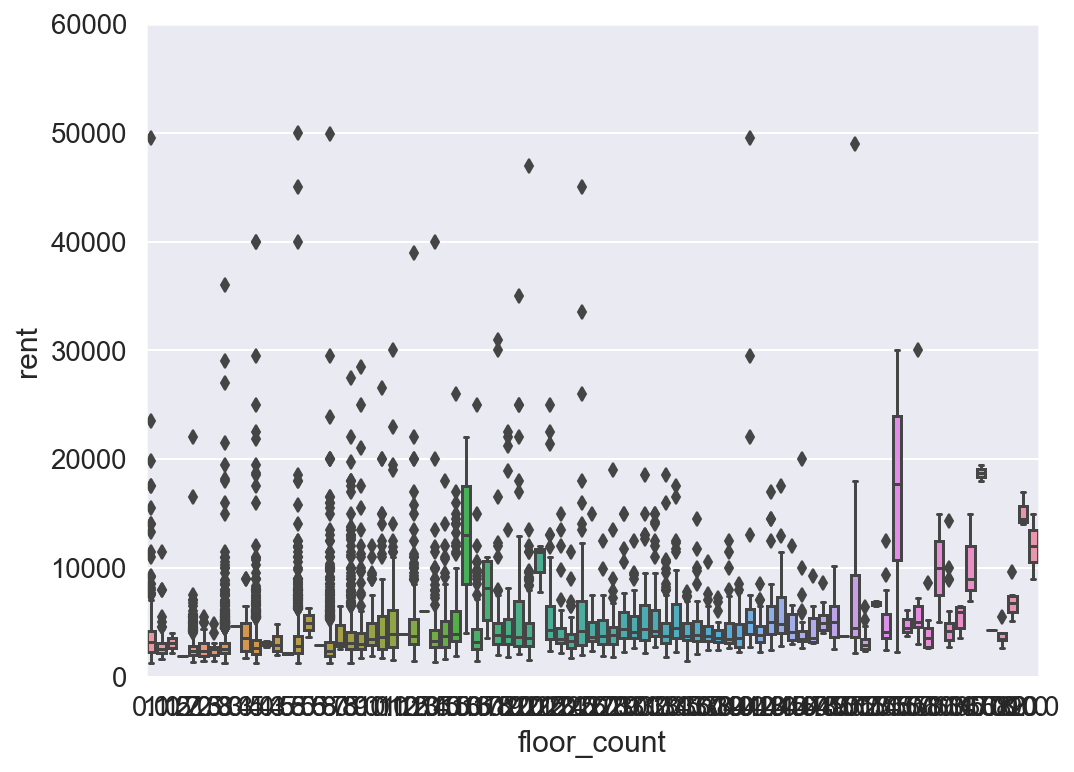

In [25]:
# floor_count vs rent

var = 'floor_count'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);


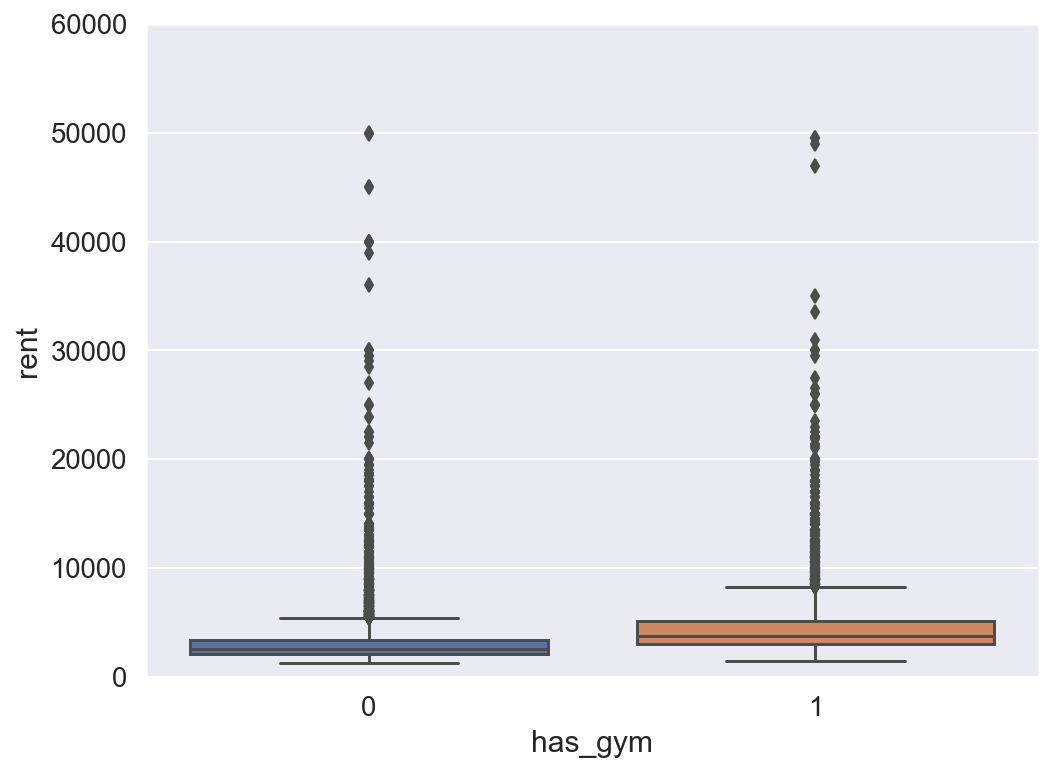

In [26]:
var = 'has_gym'
data = pd.concat([train_df['rent'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=60000);

In [27]:
# Combine Datasets

ntrain_df = train_df.shape[0]
ntest_df = test_df.shape[0]
y_train = train_df.rent.values
all_data_df = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data_df.drop(['rent'], axis=1, inplace=True)
print(f"Train data size is : {train_df.shape}")
print(f"Test data size is : {test_df.shape}")
print(f"Combined dataset size is : {all_data_df.shape}")


Train data size is : (11990, 37)
Test data size is : (2000, 37)
Combined dataset size is : (13990, 36)


In [28]:
# size_sqft = 0 to nan

all_data_df.loc[all_data_df['size_sqft']==0,'size_sqft'] = np.nan

In [29]:
# bathrooms = 0 to nan
all_data_df.loc[all_data_df['bathrooms']==0,'bathrooms'] = np.nan

In [30]:
# bedrooms = 0 to nan
all_data_df.loc[all_data_df['bedrooms']==0,'bedrooms'] = np.nan

In [31]:
# Find NaN Ratio of Dataset

all_data_na = (all_data_df.isnull().sum() / len(all_data_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
line,29.492495
bedrooms,13.002144
floornumber,10.707648
size_sqft,7.255182
year_built,3.352395
min_to_subway,1.022159
unit,0.800572
addr_unit,0.771980
description,0.114367
bathrooms,0.050036


Text(0.5, 1.0, 'Percent missing data by feature')

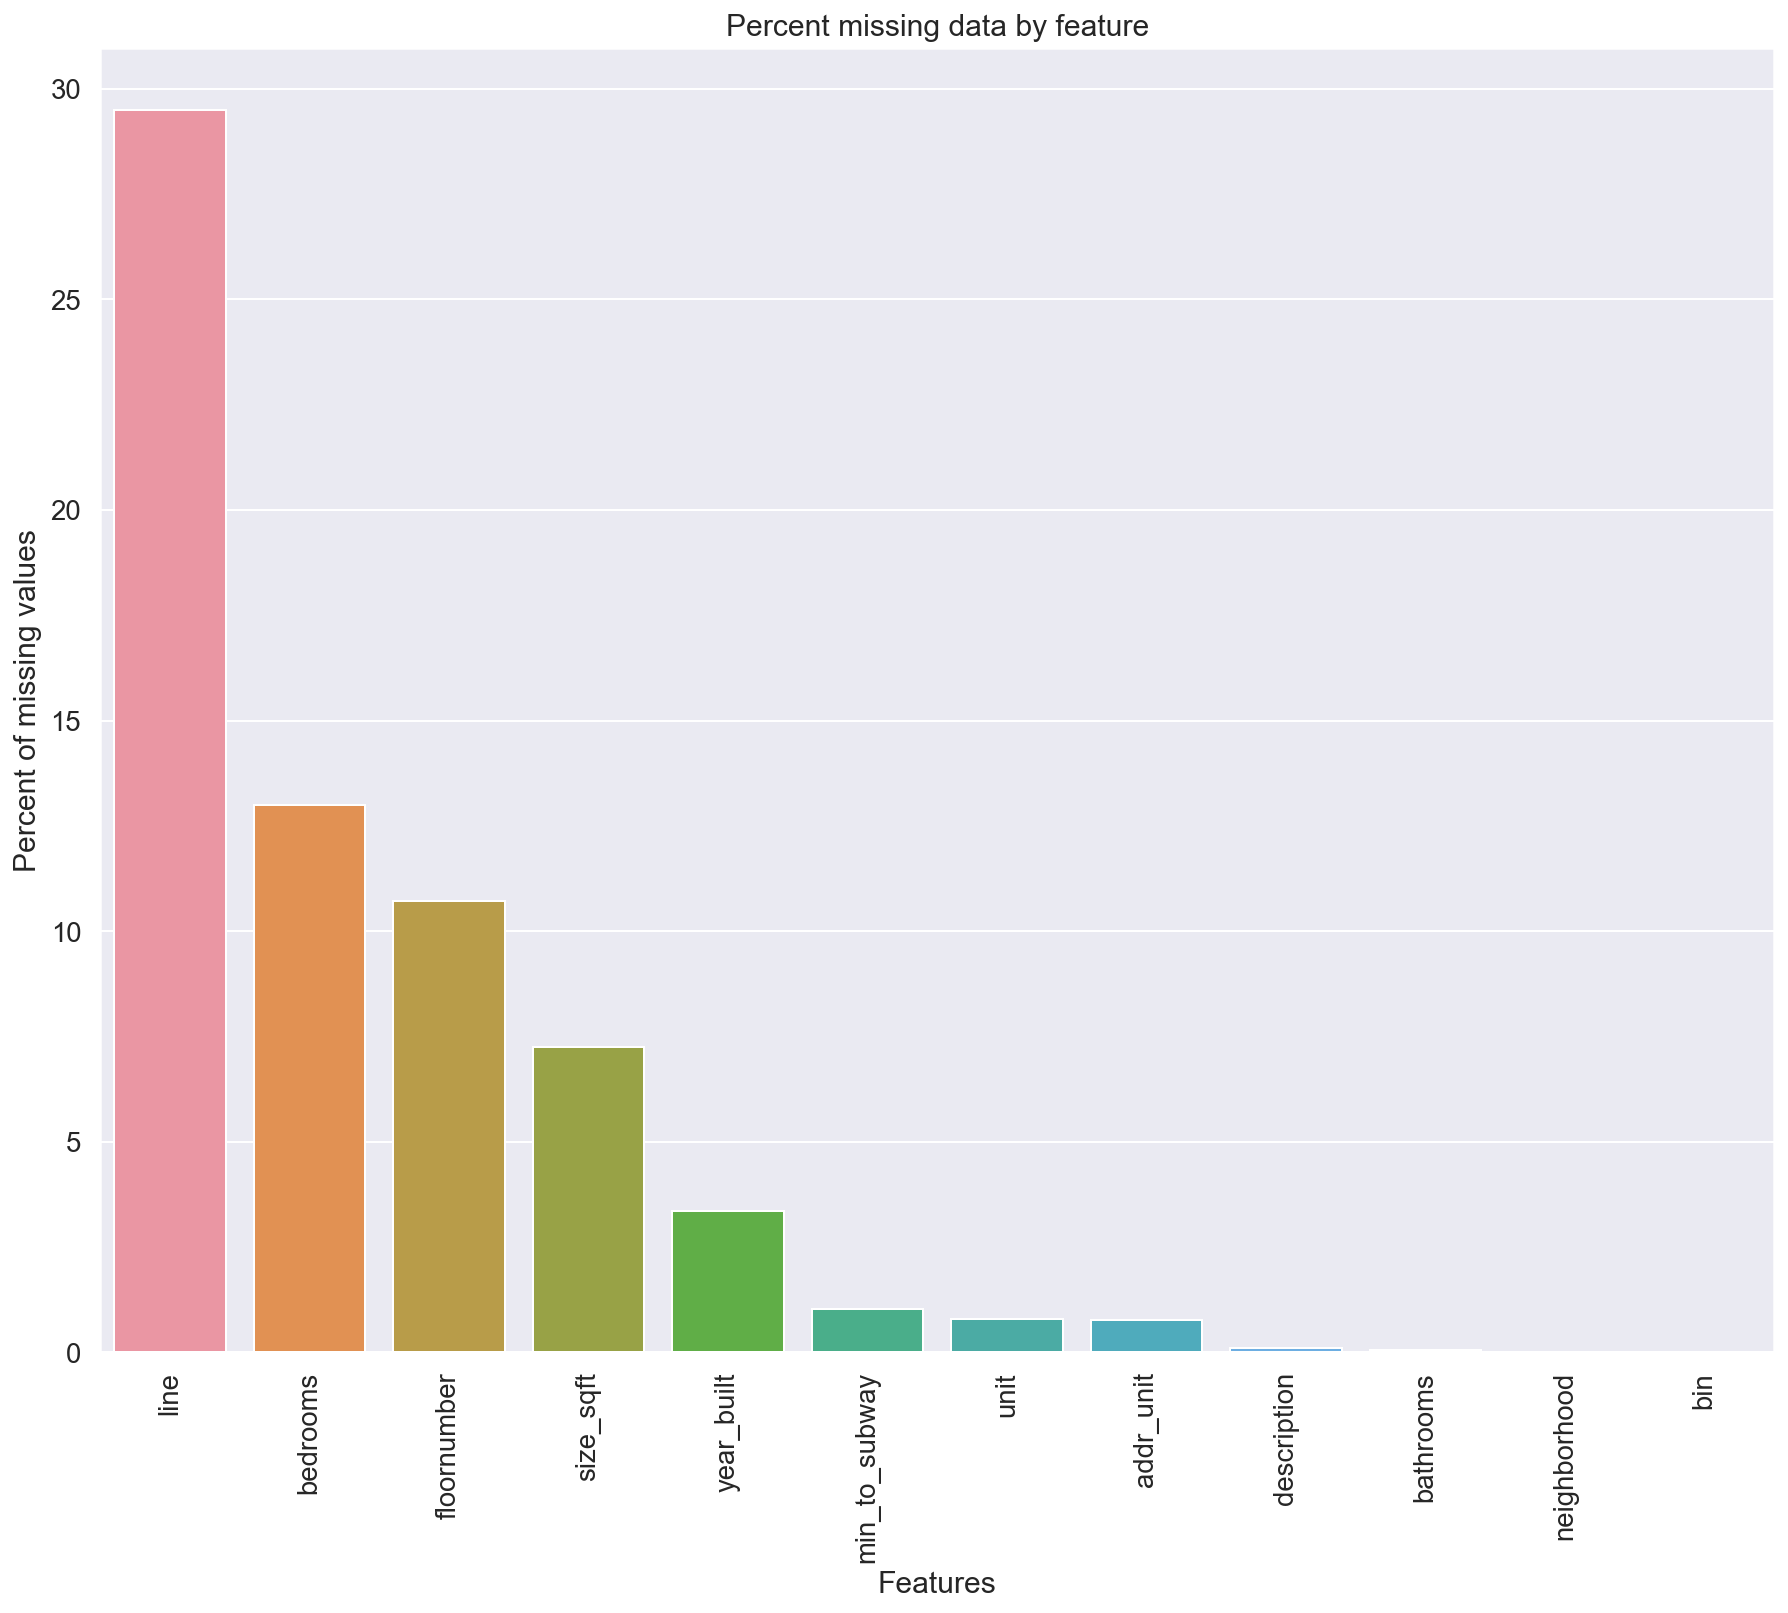

In [32]:
# Percent missing data by feature

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [71]:
most_freq_line = all_data_df.groupby(['addr_zip','neighborhood'])['line'].agg(lambda x: stats.mode(x)[0]).to_dict()

all_data_df.loc[all_data_df['line'].isnull(),'line'] = all_data_df[]


[(10001, 'Chelsea'),
 (10001, 'Flatiron'),
 (10001, 'Midtown South'),
 (10001, 'Midtown West'),
 (10001, 'Tribeca'),
 (10002, 'Chinatown'),
 (10002, 'East Village'),
 (10002, 'Lower East Side'),
 (10003, 'East Village'),
 (10003, 'Flatiron'),
 (10003, 'Gramercy Park'),
 (10003, 'Greenwich Village'),
 (10004, 'Battery Park City'),
 (10004, 'Financial District'),
 (10005, 'Financial District'),
 (10006, 'Financial District'),
 (10007, 'Tribeca'),
 (10009, 'East Village'),
 (10009, 'Stuyvesant Town/PCV'),
 (10010, 'Chelsea'),
 (10010, 'Flatiron'),
 (10010, 'Gramercy Park'),
 (10010, 'Midtown East'),
 (10010, 'Stuyvesant Town/PCV'),
 (10011, 'Chelsea'),
 (10011, 'Flatiron'),
 (10011, 'Greenwich Village'),
 (10011, 'West Village'),
 (10012, 'Greenwich Village'),
 (10012, 'Nolita'),
 (10012, 'Soho'),
 (10013, 'Chinatown'),
 (10013, 'Little Italy'),
 (10013, 'Nolita'),
 (10013, 'Soho'),
 (10013, 'Tribeca'),
 (10014, 'Chelsea'),
 (10014, 'Soho'),
 (10014, 'West Village'),
 (10016, 'Flatiron'),